In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download()
import re
import string 
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer as CV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [3]:
train_data = pd.read_csv("train_data.csv", sep=':::', names=["Id","Title", "Genre", "Description"], engine='python')
test_data = pd.read_csv("test_data.csv", sep=':::', names=["Id","Title", "Description"], engine='python')

In [4]:
train_data.head(10)

,Id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
5,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
6,7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...
7,8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...
8,9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss..."
9,10,Spirits (2014/I),horror,Four high school students embark on a terrify...


In [5]:
train_data.head(5)['Genre'].values

array([' drama ', ' thriller ', ' adult ', ' drama ', ' drama '],
      dtype=object)

In [6]:
train_data.head(7)['Title'].values

array([' Oscar et la dame rose (2009) ', ' Cupid (1997) ',
       ' Young, Wild and Wonderful (1980) ', ' The Secret Sin (1915) ',
       ' The Unrecovered (2007) ', ' Quality Control (2011) ',
       ' "Pink Slip" (2009) '], dtype=object)

In [7]:
test_data.head()

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [8]:
test_data.head(7)['Title'].values

array([" Edgar's Lunch (1998) ", ' La guerra de papá (1977) ',
       ' Off the Beaten Track (2010) ', ' Meu Amigo Hindu (2015) ',
       ' Er nu zhai (1955) ', ' Riddle Room (2016) ', " L'amica (1969) "],
      dtype=object)

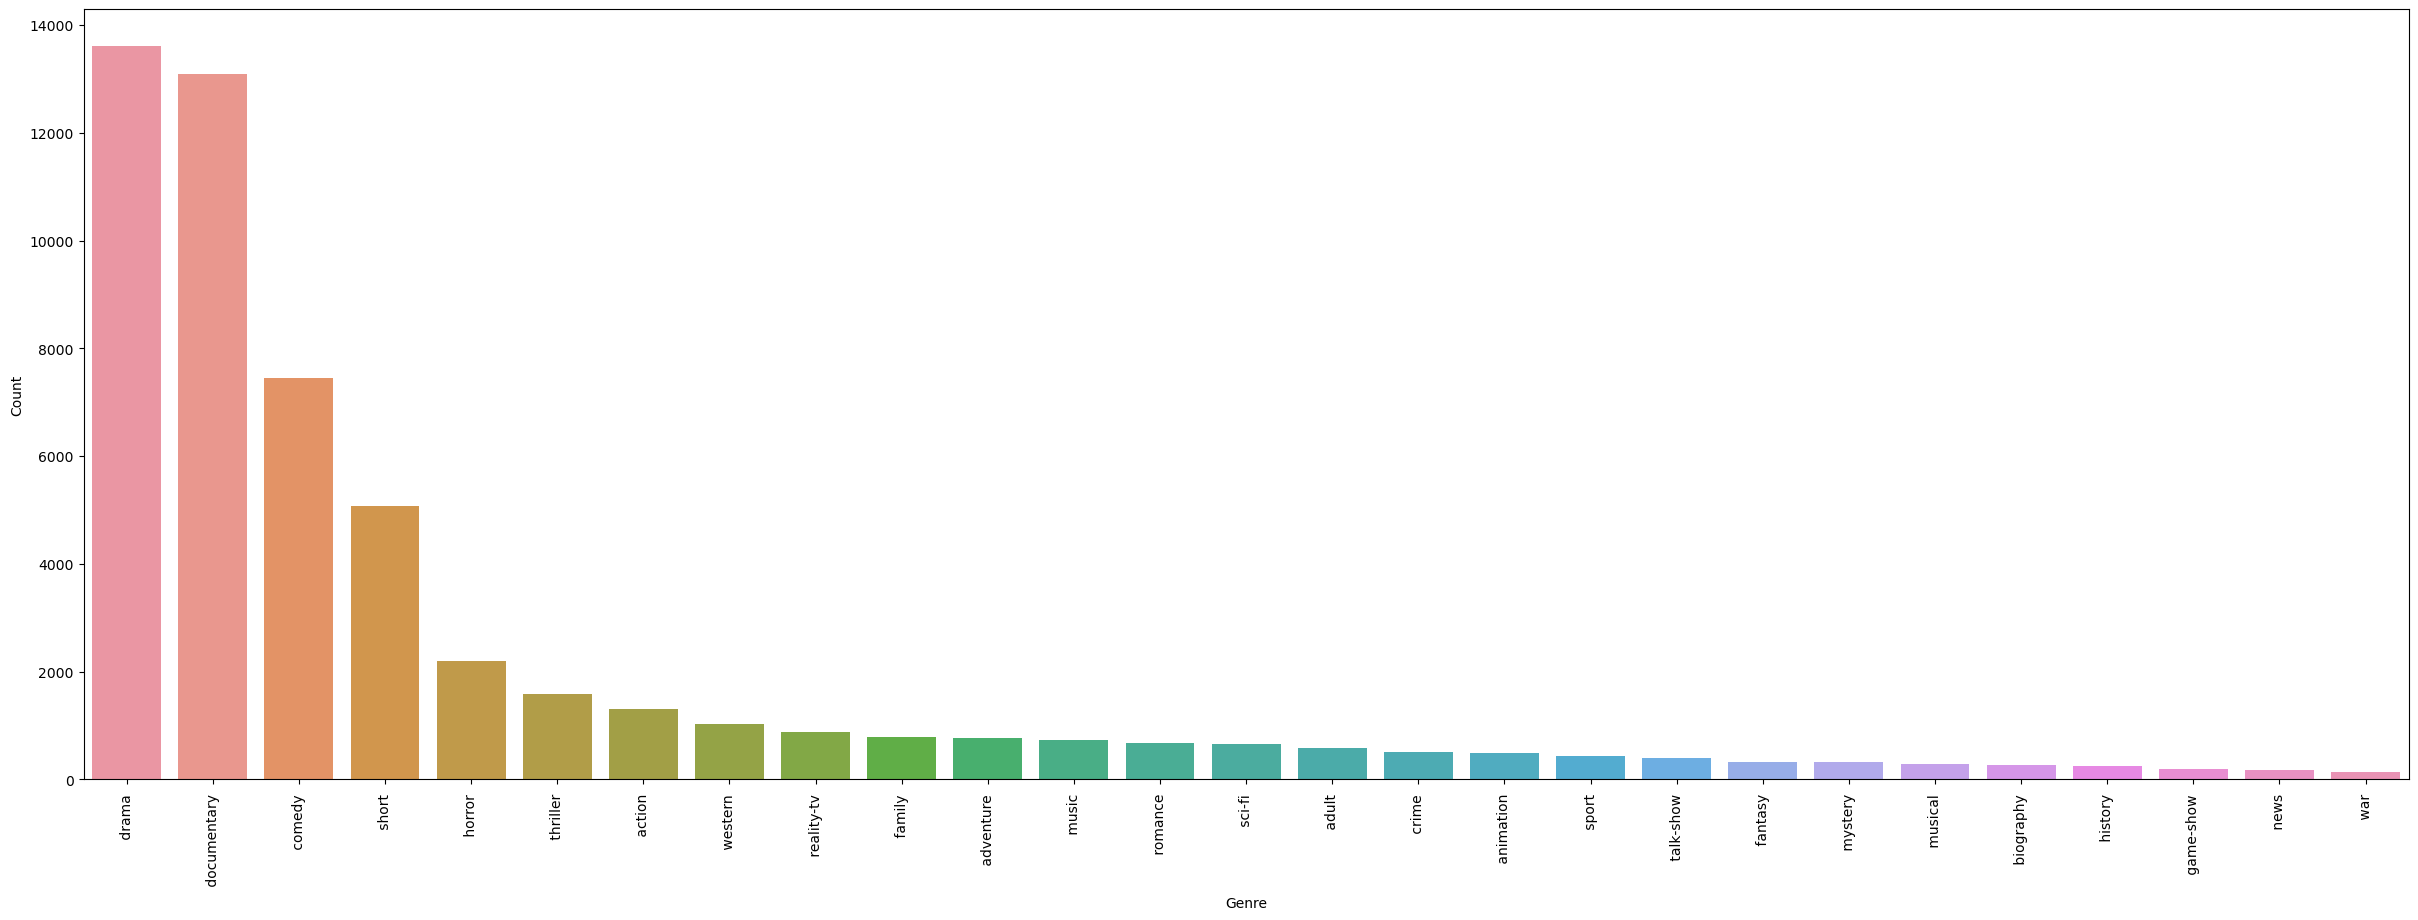

In [9]:
plt.figure(figsize=(30,10))
counts = train_data.Genre.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90);

Text(0, 0.5, 'Genre')

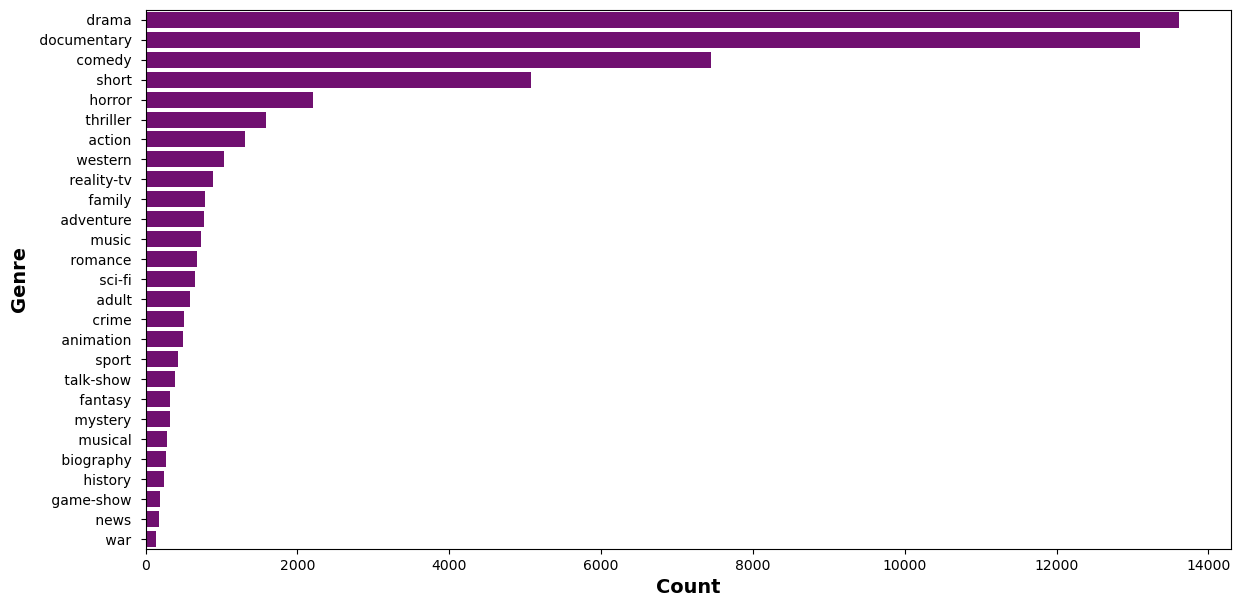

In [10]:
plt.figure(figsize = (14, 7))
sns.countplot(data = train_data, y = 'Genre', hue = None, order = train_data['Genre'].value_counts().index,color="purple")
plt.xlabel('Count', fontsize = 14, fontweight = 'bold')
plt.ylabel('Genre', fontsize = 14, fontweight = 'bold')

In [11]:
train_data.describe()

,Id
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [12]:
train_data.Genre.value_counts()

Genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

In [14]:
train_data.Title.value_counts()

Title
 Oscar et la dame rose (2009)                   1
 Zauber der Boheme (1937)                       1
 To Love and to Cherish (2012)                  1
 Adult Prom (????)                              1
 Arai Enn 305-il Kadavul (2008)                 1
                                               ..
 Jureks Kino (2006)                             1
 Werk it, Bro (2016)                            1
 Vers le sud (2005)                             1
 Les beaux souvenirs (1981)                     1
 Nature's Fury: Storm of the Century (2006)     1
Name: count, Length: 54214, dtype: int64

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [16]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [17]:
train_data.isna().sum()

Id             0
Title          0
Genre          0
Description    0
dtype: int64

In [18]:
train_data.drop_duplicates()
print("shape before drop nulls",train_data.shape)
print("shape after drop nulls",train_data.shape)

shape before drop nulls (54214, 4)
shape after drop nulls (54214, 4)


In [19]:
stop_words = set(stopwords.words('english')) # stop words
def clean_data(text):
    text = text.lower()
    text = re.sub(r'@\S+','',text)                       # remove mentions
    text = re.sub(r'http\S+', '', text)                  # remove urls
    text = re.sub(r'[\w\.-]+@[\w\.-]+',"",text)          #remove emails
    text = re.sub(r"[^a-zA-Z+']", ' ', text)             # keep only english chars / remove numbers
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')      # remove single chars
    text = re.sub(r'pic.\S+', '',text)                   
    text = re.sub(r'#', "", text)                        # remove hashtags
    text = re.sub(r"_", "  ", text)                      # remove hashtags
    text = re.sub('\n'," . ",text)                       # remove new lines
    text = re.sub('\[[^]]*\]','',text)                   ## remove square prackets
    text = "".join([char for char in text if char not in string.punctuation]) # [11] remove punctuations
    text= re.sub("\s[\s]+", " ",text).strip()            ## remove repeated/leading/trailing spaces
    tokens = word_tokenize(text)                         ## Tokenize
    text = " ".join([word for word in tokens if word not in stop_words and len(word) > 2]) # [14] remove stop words
    
    return text

In [20]:
train_data['Description_cleaned'] = train_data['Description'].apply(clean_data)
test_data['Description_cleaned'] = test_data['Description'].apply(clean_data)

In [22]:
st = PorterStemmer()
train_data['Description_cleaned'] = train_data['Description_cleaned'].apply(
    lambda x: ' '.join([st.stem(word) for word in x.split()]))

test_data['Description_cleaned'] = test_data['Description_cleaned'].apply(
    lambda x: ' '.join([st.stem(word) for word in x.split()]))

In [23]:
train_data['length']=train_data['Description'].apply(len)
train_data['length_cleaned']=train_data['Description_cleaned'].apply(len)
train_data.head(10)

,Id,Title,Genre,Description,Description_cleaned,length,length_cleaned
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listen conver doctor parent year old oscar lea...,546,334
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestu relationship curre...,184,111
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bu empti student field trip museum natur histo...,650,343
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemploy father make end meet edith twin ...,1082,677
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film titl refer recov bodi ground zero also st...,625,346
5,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...,qualiti control consist seri singl take shot f...,1609,1052
6,7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...,tough econom time max joey run idea discov sen...,345,173
7,8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...,ron petri keanu reev troubl teen whose life ha...,332,190
8,9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss...",sudden calamit event cau great loss life damag...,456,267
9,10,Spirits (2014/I),horror,Four high school students embark on a terrify...,four high school student embark terrifi journe...,426,293


In [24]:
print("Length of Text Before Cleaning: ", train_data['length'].mean())
print("Length of Text After Cleaning: ", train_data['length_cleaned'].mean())


Length of Text Before Cleaning:  600.4524292618142
Length of Text After Cleaning:  358.58331796215


c:\ProgramData\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


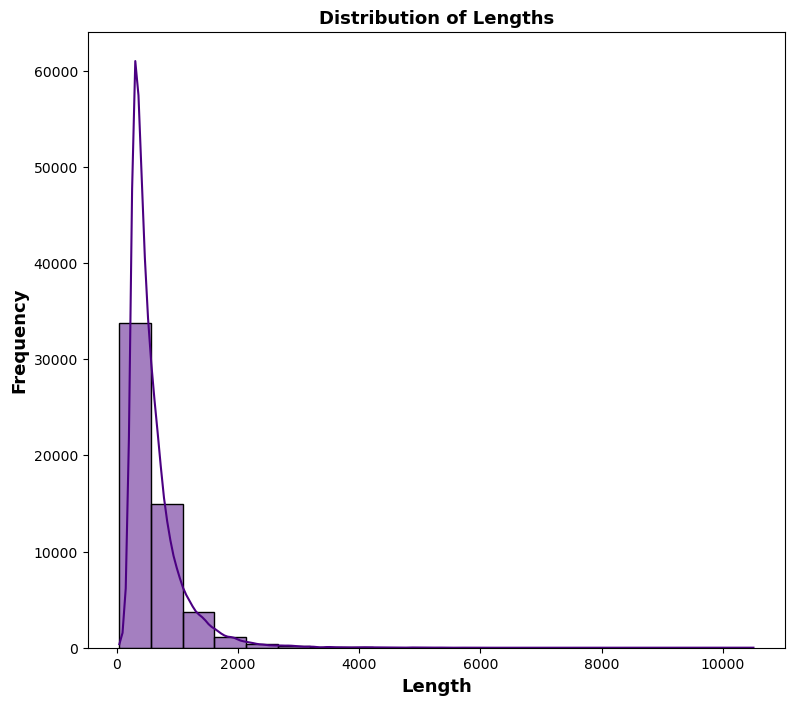

In [25]:
plt.figure(figsize=(9, 8))

sns.histplot(data=train_data, x='length', bins=20, kde=True, color='indigo')

plt.xlabel('Length', fontsize=13, fontweight='bold')
plt.ylabel('Frequency', fontsize=13, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=13, fontweight='bold');
plt.show()

In [26]:
def get_top_n_bigram(corpus, n=None):
    vec = CV(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

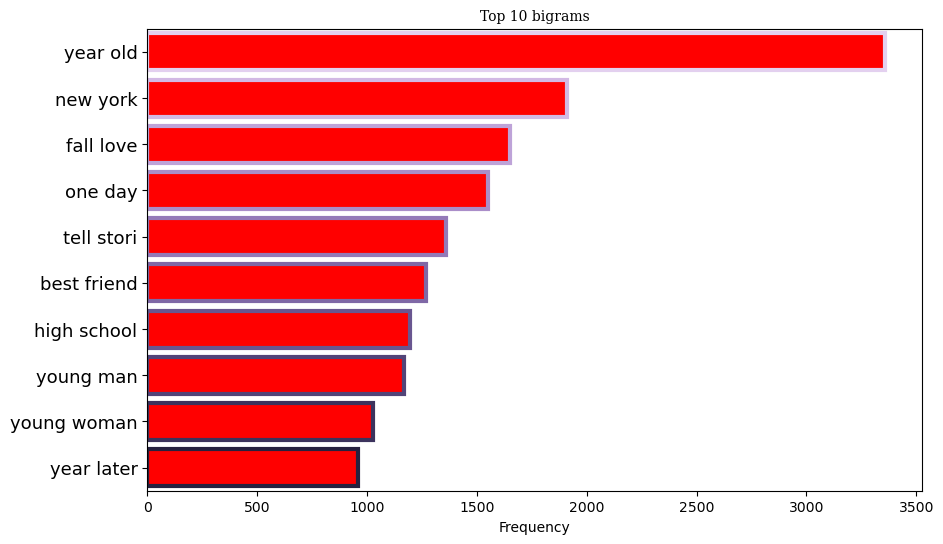

In [27]:
common_words = get_top_n_bigram(train_data['Description_cleaned'], 10)
common_words_df = pd.DataFrame(common_words,columns=['word','freq'])
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='freq', y='word', data=common_words_df,facecolor='red',linewidth=3,edgecolor=sns.color_palette("ch:start=3, rot=.1",10))

plt.title("Top 10 bigrams",font='Serif')
plt.xlabel("Frequency", fontsize=10)
plt.yticks(fontsize=13)
plt.xticks(rotation=360, fontsize=10)
plt.ylabel("");


In [28]:
le = LabelEncoder()
train_data['Genre'] = le.fit_transform(train_data['Genre'].values)

# keep only relevent columns
train_df = train_data.loc[:,['Description_cleaned', 'Genre']]
test_df = test_data.loc[:,['Description_cleaned', 'Title']]
train_df.head(10)

,Description_cleaned,Genre
0,listen conver doctor parent year old oscar lea...,8
1,brother sister past incestu relationship curre...,24
2,bu empti student field trip museum natur histo...,1
3,help unemploy father make end meet edith twin ...,8
4,film titl refer recov bodi ground zero also st...,8
5,qualiti control consist seri singl take shot f...,7
6,tough econom time max joey run idea discov sen...,5
7,ron petri keanu reev troubl teen whose life ha...,6
8,sudden calamit event cau great loss life damag...,18
9,four high school student embark terrifi journe...,13


In [29]:
train_set , val_set , train_label , val_label = train_test_split(train_df['Description_cleaned'] , train_data['Genre'] , test_size=0.2 , shuffle=True , random_state = 42)

print(f'Split data into train and eval sets')
print(f'Trani Set\t: {len(train_set)}\nValidation Set\t: {len(val_set)}')

Split data into train and eval sets
Trani Set	: 43371
Validation Set	: 10843


In [30]:
vectorize = TfidfVectorizer(stop_words='english', max_features=100000)
train_set_tfidf = vectorize.fit_transform(train_set)
val_set_tfidf = vectorize.transform(val_set)

In [31]:
LR_model = LogisticRegression()
LR_model.fit(train_set_tfidf, train_label)
predict_LR = LR_model.predict(val_set_tfidf)
print(classification_report(val_label, predict_LR))
LR_accuracy = accuracy_score(predict_LR,val_label)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))

              precision    recall  f1-score   support

           0       0.53      0.29      0.37       263
           1       0.80      0.29      0.43       112
           2       0.42      0.13      0.20       139
           3       0.45      0.05      0.09       104
           4       0.00      0.00      0.00        61
           5       0.52      0.58      0.55      1443
           6       0.27      0.03      0.05       107
           7       0.67      0.84      0.75      2659
           8       0.54      0.80      0.64      2697
           9       0.41      0.09      0.15       150
          10       0.00      0.00      0.00        74
          11       0.94      0.42      0.59        40
          12       0.00      0.00      0.00        45
          13       0.66      0.59      0.62       431
          14       0.66      0.51      0.57       144
          15       0.00      0.00      0.00        50
          16       0.00      0.00      0.00        56
          17       0.00    

c:\ProgramData\anaconda3\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-

In [32]:
NB_model = MultinomialNB()
NB_model.fit(train_set_tfidf, train_label)
y_pred_naive = NB_model.predict(val_set_tfidf)
print(classification_report(val_label, y_pred_naive))
naive_accuracy = accuracy_score(y_pred_naive,val_label)
print('Naive Bayes model accuracy is: {:.2f}%'.format(naive_accuracy*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       263
           1       0.00      0.00      0.00       112
           2       0.00      0.00      0.00       139
           3       0.00      0.00      0.00       104
           4       0.00      0.00      0.00        61
           5       0.65      0.05      0.09      1443
           6       0.00      0.00      0.00       107
           7       0.51      0.89      0.65      2659
           8       0.38      0.87      0.53      2697
           9       0.00      0.00      0.00       150
          10       0.00      0.00      0.00        74
          11       0.00      0.00      0.00        40
          12       0.00      0.00      0.00        45
          13       0.00      0.00      0.00       431
          14       0.00      0.00      0.00       144
          15       0.00      0.00      0.00        50
          16       0.00      0.00      0.00        56
          17       0.00    

c:\ProgramData\anaconda3\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
DT = DecisionTreeClassifier(max_depth=(1), random_state=0)
DT.fit(train_set_tfidf, train_label)
predict_ID3 = DT.predict(val_set_tfidf)
print(classification_report(val_label, predict_ID3))
ID3_accuracy = accuracy_score(predict_ID3,val_label)
print('ID3 model accuracy is: {:.2f}%'.format(ID3_accuracy*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       263
           1       0.00      0.00      0.00       112
           2       0.00      0.00      0.00       139
           3       0.00      0.00      0.00       104
           4       0.00      0.00      0.00        61
           5       0.00      0.00      0.00      1443
           6       0.00      0.00      0.00       107
           7       0.82      0.31      0.45      2659
           8       0.27      0.99      0.43      2697
           9       0.00      0.00      0.00       150
          10       0.00      0.00      0.00        74
          11       0.00      0.00      0.00        40
          12       0.00      0.00      0.00        45
          13       0.00      0.00      0.00       431
          14       0.00      0.00      0.00       144
          15       0.00      0.00      0.00        50
          16       0.00      0.00      0.00        56
          17       0.00    

c:\ProgramData\anaconda3\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(train_set_tfidf, train_label)
predict = svm_model.predict(val_set_tfidf)

print(classification_report(val_label, predict))
svm_accuracy = accuracy_score(predict,val_label)
print('SVC model accuracy is: {:.2f}%'.format(svm_accuracy*100))

              precision    recall  f1-score   support

           0       0.45      0.33      0.39       263
           1       0.68      0.45      0.54       112
           2       0.39      0.21      0.27       139
           3       0.38      0.13      0.20       104
           4       0.00      0.00      0.00        61
           5       0.53      0.58      0.55      1443
           6       0.28      0.07      0.12       107
           7       0.68      0.80      0.73      2659
           8       0.55      0.70      0.62      2697
           9       0.38      0.15      0.22       150
          10       0.40      0.05      0.10        74
          11       0.87      0.65      0.74        40
          12       0.20      0.02      0.04        45
          13       0.60      0.64      0.62       431
          14       0.56      0.52      0.54       144
          15       0.27      0.06      0.10        50
          16       0.17      0.02      0.03        56
          17       0.25    

In [35]:
columns=['LogisticRegression', 'MultinomialNB', 'Decision_Tree','SVC']
accuracy= [LR_accuracy, naive_accuracy, ID3_accuracy, svm_accuracy]

FinalResult=pd.DataFrame({'Algorithm':columns, 'Accuracy':accuracy})

FinalResult

,Algorithm,Accuracy
0,LogisticRegression,0.583326
1,MultinomialNB,0.440930
2,Decision_Tree,0.322973
3,SVC,0.571890


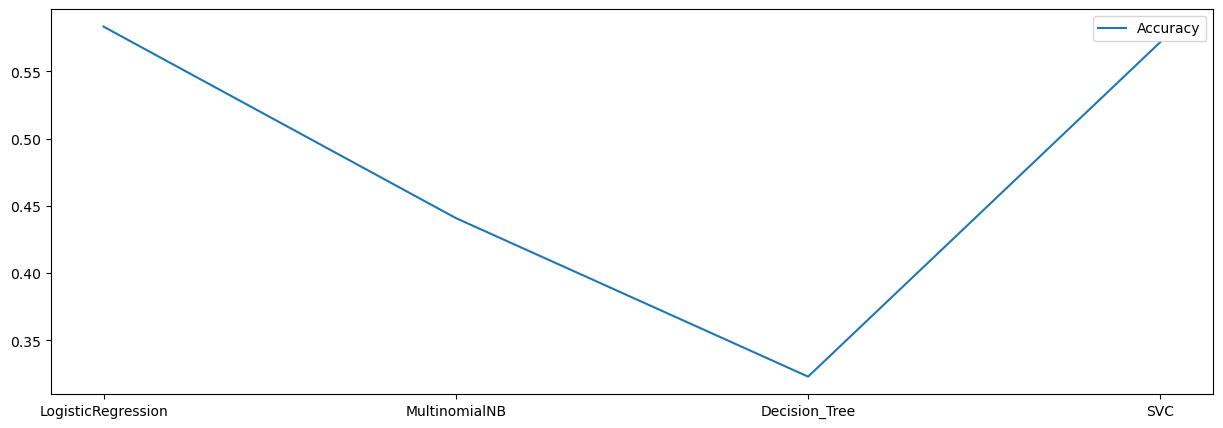

In [36]:
fig,ax=plt.subplots(figsize=(15,5))
plt.plot(FinalResult.Algorithm,accuracy,label="Accuracy")
plt.legend()
plt.show()

In [37]:
train_data.head(15)

,Id,Title,Genre,Description,Description_cleaned,length,length_cleaned
0,1,Oscar et la dame rose (2009),8,Listening in to a conversation between his do...,listen conver doctor parent year old oscar lea...,546,334
1,2,Cupid (1997),24,A brother and sister with a past incestuous r...,brother sister past incestu relationship curre...,184,111
2,3,"Young, Wild and Wonderful (1980)",1,As the bus empties the students for their fie...,bu empti student field trip museum natur histo...,650,343
3,4,The Secret Sin (1915),8,To help their unemployed father make ends mee...,help unemploy father make end meet edith twin ...,1082,677
4,5,The Unrecovered (2007),8,The film's title refers not only to the un-re...,film titl refer recov bodi ground zero also st...,625,346
5,6,Quality Control (2011),7,Quality Control consists of a series of 16mm ...,qualiti control consist seri singl take shot f...,1609,1052
6,7,"""Pink Slip"" (2009)",5,In tough economic times Max and Joey have all...,tough econom time max joey run idea discov sen...,345,173
7,8,One Step Away (1985),6,Ron Petrie (Keanu Reeves) is a troubled teen ...,ron petri keanu reev troubl teen whose life ha...,332,190
8,9,"""Desperate Hours"" (2016)",18,"A sudden calamitous event, causing great loss...",sudden calamit event cau great loss life damag...,456,267
9,10,Spirits (2014/I),13,Four high school students embark on a terrify...,four high school student embark terrifi journe...,426,293
